In [1]:
import tensorflow as tf
import os
tf.__version__

'2.13.0'

In [3]:
# Function to read and decode a wav file, returning the transpose of the resultant tensor
def load_audio(file_path, sample_rate=44100):
    # Load audio at 44.1kHz sample-rate
    audio = tf.io.read_file(file_path)
    audio, sample_rate = tf.audio.decode_wav(audio, desired_channels=-1, desired_samples=sample_rate)

    return tf.transpose(audio)

prefix = "../input_data/data_speech_commands_v0.02/zero/"

# get the path to every audio file in the data path
paths = [os.path.join(prefix, path) for path in os.listdir(prefix)]

paths

['../input_data/data_speech_commands_v0.02/zero/004ae714_nohash_0.wav',
 '../input_data/data_speech_commands_v0.02/zero/004ae714_nohash_1.wav',
 '../input_data/data_speech_commands_v0.02/zero/01b4757a_nohash_0.wav',
 '../input_data/data_speech_commands_v0.02/zero/01bb6a2a_nohash_0.wav',
 '../input_data/data_speech_commands_v0.02/zero/01bb6a2a_nohash_1.wav',
 '../input_data/data_speech_commands_v0.02/zero/01bb6a2a_nohash_2.wav',
 '../input_data/data_speech_commands_v0.02/zero/01bb6a2a_nohash_3.wav',
 '../input_data/data_speech_commands_v0.02/zero/01bb6a2a_nohash_4.wav',
 '../input_data/data_speech_commands_v0.02/zero/01bcfc0c_nohash_0.wav',
 '../input_data/data_speech_commands_v0.02/zero/01bcfc0c_nohash_1.wav',
 '../input_data/data_speech_commands_v0.02/zero/01bcfc0c_nohash_2.wav',
 '../input_data/data_speech_commands_v0.02/zero/02ade946_nohash_0.wav',
 '../input_data/data_speech_commands_v0.02/zero/02ade946_nohash_1.wav',
 '../input_data/data_speech_commands_v0.02/zero/02ade946_nohash_

In [4]:
# A function that prepares the dataset by shuffling it
def prep_ds(ds, shuffle_buffer_size=1024, batch_size=32):
    # Shuffle the dataset
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    # Load and decode audio from file paths, using `map()` to call `load_audio()` for any training data selected
    ds = ds.map(load_audio)
    # Take the absolute value
    ds = ds.map(tf.abs)
    # Apply log1p function, adding 1 to the value and then getting the logarithm of it
    ds = ds.map(tf.math.log1p)
    # Repeat dataset forever
    ds = ds.repeat()
    # Batch the dataset
    ds = ds.batch(batch_size)
    # Prefetch
    ds = ds.prefetch(buffer_size=batch_size)

    return ds

ds = tf.data.Dataset.from_tensor_slices(paths)
train_ds = prep_ds(ds)

for x in train_ds.take(1):
     print(x)

tf.Tensor(
[[[1.1589960e-03 1.1589960e-03 1.2199586e-03 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]

 [[3.0517112e-05 6.1033294e-05 3.0517112e-05 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]

 [[0.0000000e+00 3.0517112e-05 6.1033294e-05 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]

 ...

 [[1.8308870e-04 1.5257625e-04 2.1360024e-04 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]

 [[3.6614388e-04 7.0165814e-04 8.8461838e-04 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]

 [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]], shape=(32, 1, 44100), dtype=float32)


Text(0, 0.5, 'Value')

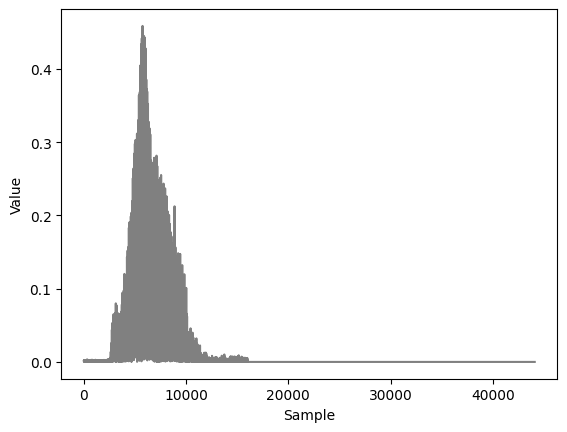

In [5]:
import matplotlib.pyplot as plt

plt.plot(x[0,:,:].numpy().T, color = 'gray')
plt.xlabel('Sample')
plt.ylabel('Value')